# Data Science project 1, Diabetes Health Indicators

## ML6, Integrify

### Hannu Kiiskinen, 21.11.2023

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f, f_oneway
from sklearn.ensemble import RandomForestClassifier

## Descriptive statistics

### Dataset

Diabetes Health Indicators Dataset from Kaggle. Data collection year is 2015.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services.

License: CC0, Public Domain

In [2]:
# Loading the data
df = pd.read_csv("DS_Project1/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Data review

- 253680 entries
- 22 columns (including 1 label)
- all float data type
- no missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

### Distribution of data

In [5]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Factors (meaning of the columns)

Most of the factors are having binary values 0/1, excpetions are marked as <font color='red'>red</font>, continuous Factors are <strong><font color='green'>BMI, MentHlth and PhysHlth</font></strong>.

- Diabetes_binary, 0 = no diabetes, 1 = diabetes
- HighBP, 0 = no high Blod Pressure, 1 = high Blod Pressure
- HighChol, 0 = no high cholesterol, 1 = high cholesterol
- CholCheck, 0 = no check, 1 = cholesterol checked in 5 years
- <strong><font color='green'>BMI, Body Mass Index</font></strong>
- Smoker, Have you smoked at least 100 cigarettes in your entire life, 0 = no, 1 = yes
- Stroke, Ever told you had a stroke, 0 = no, 1 = yes
- HeartDiseaseorAttack, coronary heart disease (CHD) or myocardial infarction (MI), 0 = no, 1 = yes
- PhysActivity, physical activity in past 30 days - not including job, 0 = no, 1 = yes
- Fruits, consume fruit 1 or more times per day, 0 = no, 1 = yes
- Veggies, consume vegetables 1 or more times per day, 0 = no, 1 = yes
- HvyAlcoholConsump, adult men >= 14 drinks per week and adult women >= 7 drinks per week, 0 = no, 1 = yes
- AnyHealthcare, have any kind of heaalth care coverage including health insurance prepaid plans such as HMO, 0 = no, 1 = yes
- NoDocbcCost, was there a time in the past 12 months when you needed to see a doctor but could not because of cost, 0 = no, 1 = yes
- <font color='red'>GenHlth, would you say that in general your health is in scale 1-5, 1=excellent, 2=very good, 3=good, 4=fair, 5=poor</font>
- <strong><font color='green'>MentHlth, days of poor mental health in scale 1-30 days</font></strong>
- <strong><font color='green'>PhysHlth, physical illness or injury days in past 30 days in scale 1-30</font></strong>
- DiffWalk, do you have serious difficulty walking or climbing stairs, 0 = no, 1 = yes
- Sex, 0 = female, 1 = male
- <font color='red'>Age, 13-level age category, 1 = 18-24, 9 = 60-64, 13 = 80 or older</font>
- <font color='red'>Education, education level in scale 1-6, 1 = Never attended school or kindergarden, 2 = elementary etc.</font>
- <font color='red'>Income, income in scale 1-8, 1 = less than 10 kUSD, 5 = less than 35 kUSD, 8 = 75 kUSD or more</font>

### Relationships between features


Random Forrest Classifier used to find the most important features:
- BMI is the most important feature to explain Diabetes
- Age is the second most important feature to explain Diabetes 

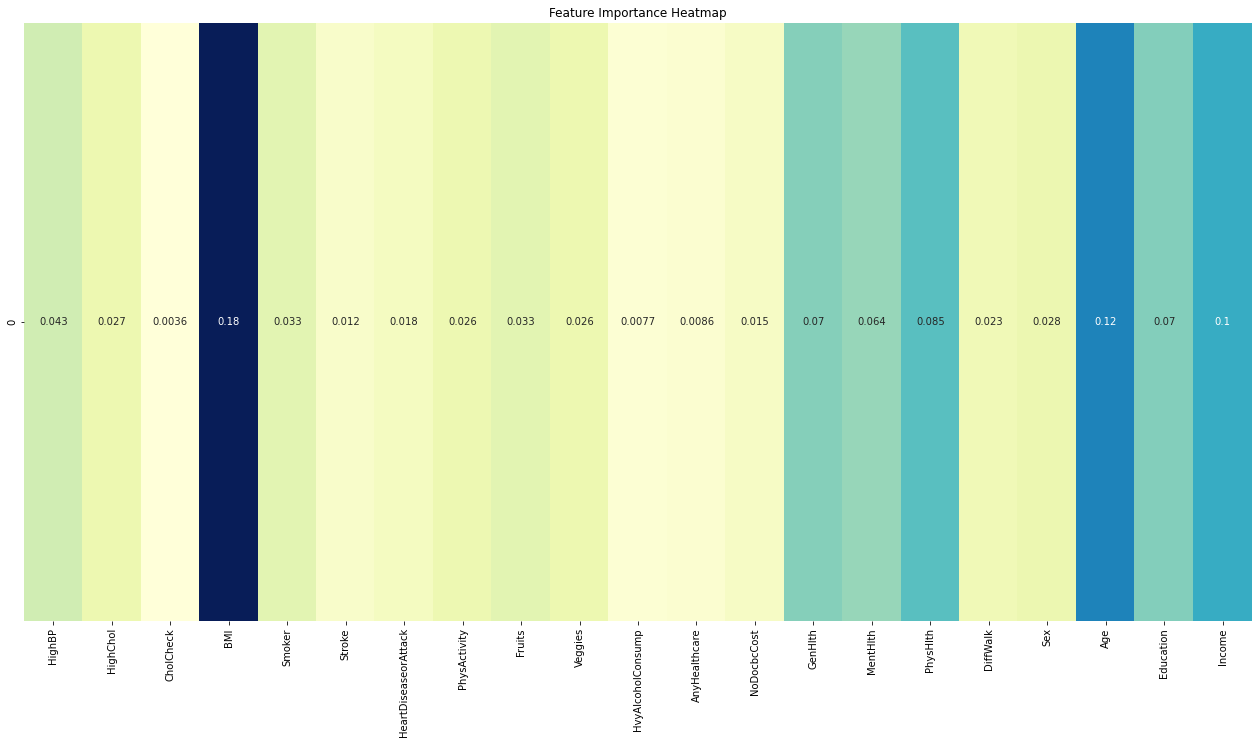

In [6]:
# Split the data to Features and Target
X, y = df.iloc[:, 1:], df.iloc[:, 0]

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Extract feature importances
feature_importances = clf.feature_importances_

# Create a heatmap of feature importances
plt.figure(figsize=(22, 11))
sns.heatmap([feature_importances], annot=True, cmap="YlGnBu", xticklabels=X.columns, cbar=False)
plt.title("Feature Importance Heatmap")
plt.show()

## Explotary Data Analysis

Check first the Categorical values so that there are no errors (values out of given gatogories):
- no errors found

In [7]:
# Filter Categorical Factors
df1 = df.filter(items=['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                       'PhysActivity', 'Fruits', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'AnyHealthcare', 'GenHlth', 'DiffWalk',
                       'Sex', 'Education', 'Income'])

# Show unique values of each Factor
pd.Series(list(map(set,df1.values.T)),index=df1.columns)

Diabetes_binary                                       {0.0, 1.0}
HighBP                                                {0.0, 1.0}
HighChol                                              {0.0, 1.0}
CholCheck                                             {0.0, 1.0}
Smoker                                                {0.0, 1.0}
Stroke                                                {0.0, 1.0}
HeartDiseaseorAttack                                  {0.0, 1.0}
PhysActivity                                          {0.0, 1.0}
Fruits                                                {0.0, 1.0}
HeartDiseaseorAttack                                  {0.0, 1.0}
PhysActivity                                          {0.0, 1.0}
Fruits                                                {0.0, 1.0}
Veggies                                               {0.0, 1.0}
HvyAlcoholConsump                                     {0.0, 1.0}
AnyHealthcare                                         {0.0, 1.0}
NoDocbcCost              

Checking Age separately as this will be used for testing:
- Age group 9 having the most of the values

    13-level age category, 1 = 18-24, 9 = 60-64, 13 = 80 or older

In [8]:
# Show value counts of Age
print(df.Age.value_counts())

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64


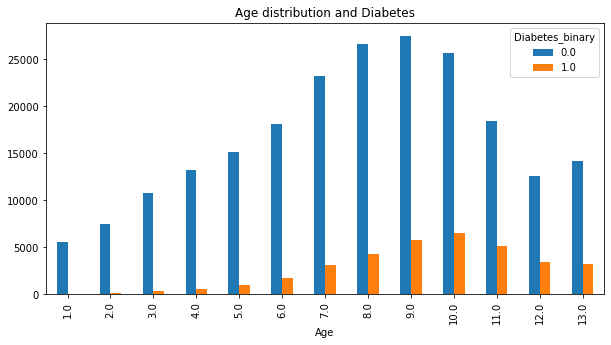

In [9]:
# Plot distribution of Age, show also Diabetes binary
pd.crosstab(df['Age'] ,df['Diabetes_binary']).plot.bar()
# Add labels and a title
plt.title('Age distribution and Diabetes')
plt.gcf().set_size_inches(10,5)
plt.show()

Checking also the continuous Factors:
- all Factors having outliers

<AxesSubplot:>

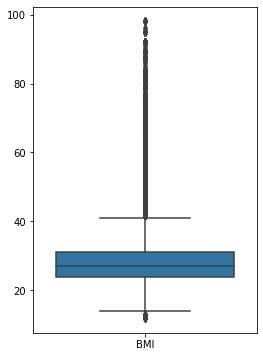

In [10]:
# BoxPlot to show ourliers
df1 = df.filter(items=['BMI'])
plt.figure(figsize=(4, 6))
sns.boxplot(data=df1) 

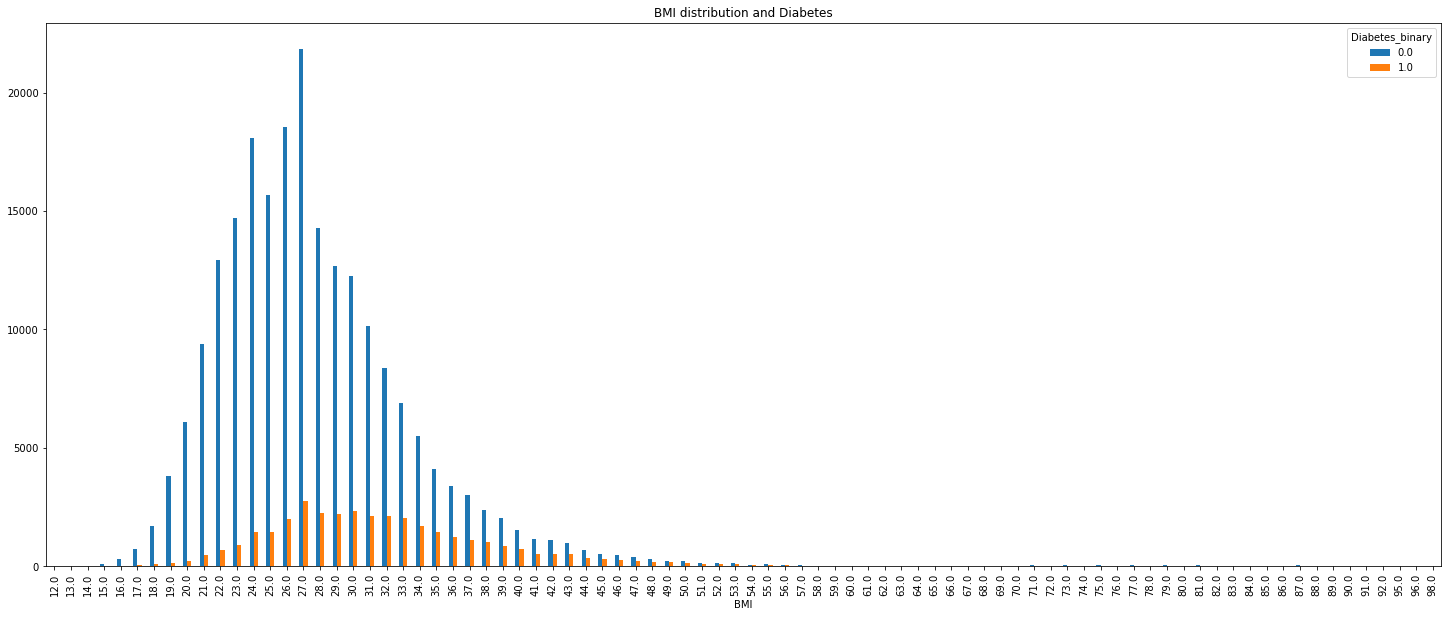

In [11]:
# Plot distribution of BMI, show also Diabetes binary
pd.crosstab(df['BMI'] ,df['Diabetes_binary']).plot.bar()
# Add labels and a title
plt.title('BMI distribution and Diabetes')
plt.gcf().set_size_inches(25,10)
plt.show()

<AxesSubplot:xlabel='Diabetes_binary', ylabel='BMI'>

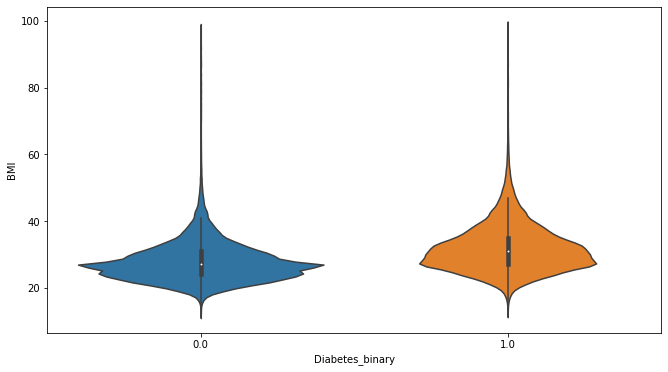

In [12]:
# Print ViolinPlot to show distribution of BMI
plt.figure(figsize=(11, 6))
sns.violinplot(data=df, y="BMI", x="Diabetes_binary")

In [13]:
# Test the normality of BMI (just in case)
df1 = df.filter(items=['BMI'])
alpha = 0.05
_, p_value = stats.shapiro(df1)
if p_value < alpha:
    print('BMI is not normally distributed')
else:
    print('BMI is normally distributed')

BMI is not normally distributed


C:\Users\Hannu\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Clean the data

- No errors, dublicates or missing values

### Transformation

- BMI, MentHlth and PhysHlth are having continuous values, all the rest are categorical
- all the categorical are already numerical

## Research question 1

### Is there a relationship between people's Age-group and Diabetes?

#### Hypothesis definition

H0: There are significant association between Age-group and Diabetes

H1: There are no significant association between Age-group and Diabetes

In [14]:
# Select the data
contingency_table1 = pd.crosstab(df['Diabetes_binary'], df['Age'])
contingency_table1

Age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Diabetes_binary,,,,,,,,,,,,,
0.0,5622,7458,10809,13197,15106,18077,23226,26569,27511,25636,18392,12577,14154
1.0,78,140,314,626,1051,1742,3088,4263,5733,6558,5141,3403,3209


### Test selection

As the data is Categorial, Chi-square test will be used.

### Result of the test

As test will show, there are significant association between Age-groups and Diabetes risk.

In [15]:
# Using Chi-square test, test the hypothesis
stat, p, dof, expected = chi2_contingency(contingency_table1)

# interpret p-value
alpha = 0.05
print(f"\nChi_S-value: {stat.round(1)}, Significance Level (alpha): {alpha}, p-value: {p}")
if p <= alpha:
    print('Accept H0, There are significant association between Age-groups and Diabetes.')
else:
    print('Reject H0, There are no significant association between Age-groups and Diabetes.')


Chi_S-value: 8795.1, Significance Level (alpha): 0.05, p-value: 0.0
Accept H0, There are significant association between Age-groups and Diabetes.


In [16]:
# Data for additional check with younger people
contingency_table2 = contingency_table1.iloc[:, 0:2]
print(contingency_table2)

# Using Chi-square test, test the hypothesis
stat, p, dof, expected = chi2_contingency(contingency_table2)

# interpret p-value
alpha = 0.05
print(f"\nChi_S-value: {stat.round(1)}, Significance Level (alpha): {alpha}, p-value: {p}")
if p <= alpha:
    print('Accept H0, There are significant association between Age-groups and Diabetes.')
else:
    print('Reject H0, There are no significant association between Age-groups and Diabetes.')

Age               1.0   2.0
Diabetes_binary            
0.0              5622  7458
1.0                78   140

Chi_S-value: 4.3, Significance Level (alpha): 0.05, p-value: 0.03920842364689037
Accept H0, There are significant association between Age-groups and Diabetes.


## Research question 2

### Is there a relationship between people's BMI and Diabetes?

#### Hypothesis definition

H0: There are no significant difference in means between between BMI-groups and Diabetes

H1: There is a significant difference in means between BMI-groups and Diabetes

In [17]:
# Show value counts of BMI
np.sort(df.BMI.unique())

array([12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
       38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.,
       51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.,
       64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.,
       90., 91., 92., 95., 96., 98.])

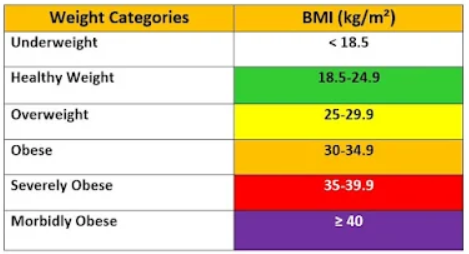

Check if BMI-level can be found which is not having significant association between BMI-groups and Diabetes.

In [19]:
# Data
upper = 18.5
df_eva = df.loc[(df['BMI'] > 0) & (df['BMI'] < upper)]
df_eva1 = df_eva[['Diabetes_binary']]['Diabetes_binary']
df_eva2 = df_eva[['BMI']]['BMI']

In [21]:
# Using Anova-test do test between different Buildings
F_Stat, p_value = stats.f_oneway(df_eva1, df_eva2)
F_Stat = round(F_Stat, 1)
p_value = round(p_value, 3)

# interpret p-value
alpha = 0.05

print(f'\nF_statistics: {F_Stat}, P_value: {p_value}, alpha: {alpha}\n')

if p_value < alpha:
    print('Reject H0, There is at-least one BMI-goup which has different mean!')
else:
    print('Accept H0, all the BMI-goup have equal means!')


F_statistics: 854887.5, P_value: 0.0, alpha: 0.05

Reject H0, There is at-least one BMI-goup which has different mean!


### Result of the test

Even in second lowest level of BMI there are at least one BMI-group having different mean and there are association between BMI-groups and Diabetes.